In [1]:
import pandas as pd
import numpy as np
import ast
from parameter_tester import mean_list_to_values, noramalise_params_array
import matplotlib.pyplot as plt

In [2]:
def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

def average_euclidean_distance(vector_arrays):
    total_distance = 0
    count = 0

    for i in range(len(vector_arrays)):
        for j in range(i + 1, len(vector_arrays)):
            vec1 = vector_arrays[i]
            vec2 = vector_arrays[j]
            total_distance += euclidean_distance(vec1, vec2)
            count += 1

    if count == 0:
        return 0  # Avoid division by zero

    return total_distance / count

In [9]:
df = pd.read_csv(r"/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/data/finding_lambda.csv", sep="|")
df = df.sort_values("lambda")
# cols = ['lambda']
# df[cols] = df[df[cols] < 48][cols]
df = df.dropna()
df = df[["lambda","num_iter","mean","final_loss"]].reset_index(drop=True)
df.head()

,lambda,num_iter,mean,final_loss
0,12,31,"[-4.2768, -21.9073, -2.0103, -19.9968, -2.5976...",0.092842
1,12,66,"[-0.8985, -18.5079, -2.6169, -17.7898, -2.3493...",0.092495
2,12,82,"[-1.3030, -18.0414, 2.3252, -15.7817, -2.5416,...",0.092495
3,12,22,"[-4.8202, -21.3358, 2.5580, -17.7112, -2.2108,...",0.094059
4,18,65,"[-6.8114, -17.8810, -0.1118, -17.1470, -1.0030...",0.092496


In [10]:
euclidean_distances = []
lambdas = df["lambda"].unique()
for lambda_ in lambdas:
    curent_means = df[df["lambda"] == lambda_]["mean"].reset_index(drop=True).to_list()
    for i, elem in enumerate(curent_means):
        curent_means[i] = np.array(noramalise_params_array(mean_list_to_values(ast.literal_eval(elem))))

    euclidean_distances.append(average_euclidean_distance(curent_means))
    

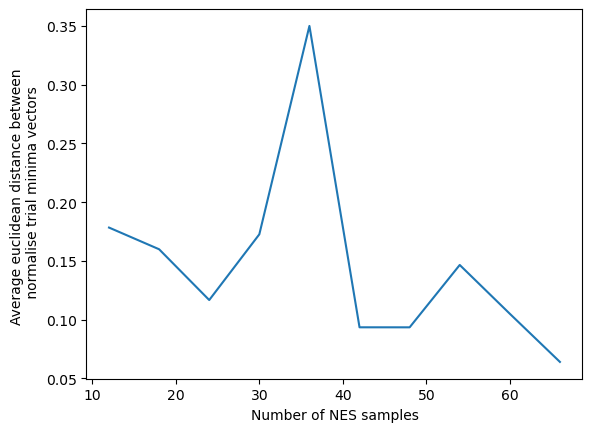

In [11]:
plt.plot(lambdas, euclidean_distances)
plt.ylabel("Average euclidean distance between \n normalise trial minima vectors")
plt.xlabel("Number of NES samples")
plt.show()

In [12]:
num_iters = []
for lambda_ in lambdas:
    curent_iter = df[df["lambda"] == lambda_]["num_iter"].reset_index(drop=True).to_numpy()
    num_iters.append(curent_iter.mean())

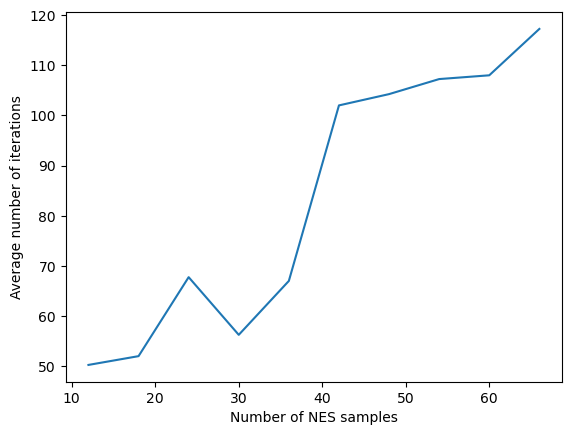

In [13]:
plt.plot(lambdas, num_iters)
plt.ylabel("Average number of iterations")
plt.xlabel("Number of NES samples")
plt.show()

In [14]:
loss = []
for lambda_ in lambdas:
    curent_loss = df[df["lambda"] == lambda_]["final_loss"].reset_index(drop=True).to_numpy()
    loss.append(curent_loss.mean())

In [ ]:
plt.plot(lambdas, loss)
plt.ylabel("Average final loss value")
plt.xlabel("Number of NES samples")
plt.show()